# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [1]:
import pandas as pd

data = pd.read_csv('data/Bryant et al 2010.csv')

data

# LHS sampling
# 1000 points experimental design



,renew req %,Pricing,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price,input record,Expen change,Incremental cost,Less than 10%,Greater than 90%
0,0.25,1,124.900001,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997,1001,60.00,276.47,0,0
1,0.25,1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003,1002,19.42,85.07,0,0
2,0.25,1,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003,1003,17.76,200.11,0,0
3,0.25,1,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003,1004,37.88,130.86,0,0
4,0.25,1,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000,1006,66.13,180.11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,0.25,1,99.199997,511.600006,0.45,89.099998,0.363,-0.387,1.75,-0.015,170.500000,1995,74.22,265.56,0,0
878,0.25,1,102.400002,751.400024,0.91,86.800003,0.318,-0.471,0.75,0.023,96.199997,1996,35.97,163.70,0,0
879,0.25,1,100.000000,527.000000,0.59,91.099998,0.410,-0.567,0.22,0.062,137.100006,1997,35.96,200.64,0,0
880,0.25,1,108.300003,694.200012,0.65,99.800003,0.355,-0.368,1.62,0.017,145.399994,1998,41.42,126.74,0,0


In [2]:
from ema_workbench.analysis import prim

# 9 uncertainties = columns 2-10
x = data.iloc[:, 2:11]

# results =  column 15
y = data.iloc[:, 15]

# assigns a value of unity for cases whose costs fall above the 90th percentile (threshold = 0.9?) and zero otherwise

prim_alg = prim.Prim(x, y, threshold=0.9, peel_alpha=0.1)
boxA = prim_alg.find_box()

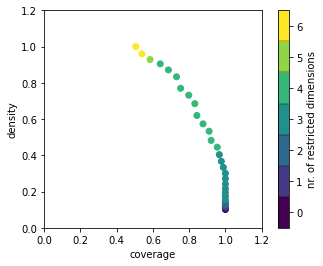

In [5]:
import matplotlib.pyplot as plt
 
boxA.show_tradeoff()
plt.show()

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


#### Methodology based on\n",
1. priori identification of potential drivers of mitigation and adaption challenges;
2. a modelling exercise to transform these drives into a large set of scenarios
3. a posteriori selection of a few SSPs among these usins clustier finding algorithms

- PRIM = Patient Rule Induction Method
- 286 scenarios spanning the range of adaption and mitigation indicators
- Model used IMACLIM-R model by some felows..

#### Usage of Prim acording to paper:
- PRIM is used on different subsamples of the dataset, and notes the fraction of subsamples for which each parameter emerges as an import driver of the scenario definition.,
- Greater then 50% means significant
- Coverage/Denisty was rounded to 5% and explains how much of the values in the area (figure 3) are according to the results)


In [1]:
import pandas as pd
data_rozenberg = pd.read_csv('data/Rozenberg et al 2014.csv')
print('shape of data:', data_rozenberg.shape)
data_rozenberg.head()

shape of data: (286, 12)


,inequalities,convergence,population,behaviors,technologies,fossils,capital markets,SSP1,SSP2,SSP3,SSP4,SSP5
0,0,2,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,1,0,0,0,0,0
2,0,2,0,0,0,1,0,0,0,0,0,0
3,0,2,0,0,0,1,1,0,0,0,0,0
4,0,2,0,0,1,0,0,0,1,0,0,0


In [58]:
import matplotlib.pyplot as plt
from ema_workbench.analysis import prim

#prim.prim needs a 1D array witht he outcome/dependent variable\n",
#Time to split up the df\n",

#SSP1\n",


def prim_analyse(df, ssp,treshold_value):
    #Take the first 7 as experiments
    x = df.loc[:, 'inequalities': 'capital markets']
    
    #Take the last SSP as outcome
    y = df[ssp]
    y.reset_index(drop = True, inplace = True)
    y.name = ssp
    y_series = y.squeeze()
    prim_alg = prim.Prim(x, y_series, threshold=treshold_value, peel_alpha=0.1)
    boxA = prim_alg.find_box()
    boxA.show_tradeoff()
    plt.show()

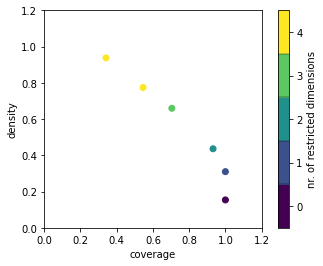

In [59]:
prim_analyse(data_rozenberg, 'SSP1', 0.8)

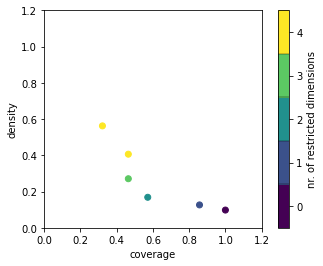

In [69]:
prim_analyse(data_rozenberg, 'SSP2', 0.5)

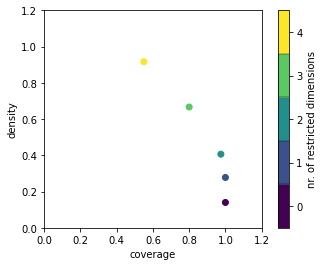

In [61]:
prim_analyse(data_rozenberg, 'SSP3', 0.8)


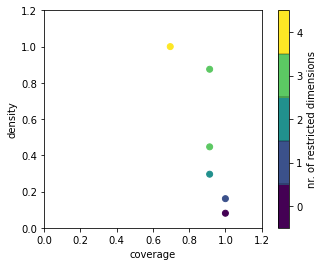

In [67]:
prim_analyse(data_rozenberg, 'SSP4', 0.8)


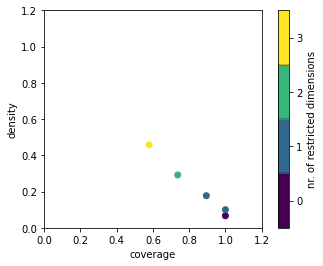

In [66]:
prim_analyse(data_rozenberg, 'SSP5', 0.4)


# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [40]:
data = outcomes['fraction renewables']
# y = data[0,:] < data[-1, :]
r1 = outcomes[y1] < t1
r2 = outcomes[y2] > t2
r3 = outocmes[y3] < t3
rc = r1 or (r2 or r3)



NameError: name 'outcomes' is not defined